In [ ]:
counter = -6
error = []
with open("IRLPRDWEBAPP1B2_W3SVC1_U_20190221T10.log" ,'r') as f:
    for line in f:
        counter += 1
        #if "Error" in line:
        print (line)
        error.append(counter)
            
print(error)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import glob
import datetime

In [2]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [3]:
col_head = ['date', 'time', 's-sitename', 's-computername', 's-ip', 'cs-method', 'cs-uri-stem', 
            'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(Referer)', 'cs-host', 'sc-status', 
            'sc-substatus', 'sc-win32-status', 'sc-bytes', 'cs-bytes', 'time-taken']
col_head2 = ['date', 'time', 's-sitename', 's-computername', 's-ip', 'cs-method', 'cs-uri-stem', 
            'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'cs-host', 'sc-status', 
            'sc-substatus', 'sc-win32-status', 'sc-bytes', 'cs-bytes', 'time-taken']
# data = pd.read_csv('IRLPRDWEBAPP1B2_W3SVC1_U_20190221T10.log', sep=" ", comment='#', header=None)
# data.columns = col_head

allFiles = glob.glob("*.log")
dictionary = {}
for file_ in allFiles:
    print(file_)
    df = pd.read_csv(file_, sep=" ", comment='#', header=None)
    if df.loc[0].count() == 19:
        df.columns = col_head
    else:
        df.columns = col_head2
    dictionary[file_] = df

IRLPRDWEBAPP1A1_W3SVC1_U_20190221T10.log
IRLPRDWEBAPP1B2_W3SVC1_U_20190221T10.log
IRLPRDWEBAPP1A3_W3SVC1_U_20190221T09.log
IRLPRDWEBAPP1B1_W3SVC1_U_20190221T09.log
IRLPRDWEBAPP1A2_W3SVC1_U_20190221T09.log
IRLPRDWEBAPP1A2_W3SVC1_U_20190221T10.log
IRLPRDWEBAPP1B1_W3SVC1_U_20190221T10.log
IRLPRDWEBAPP1A3_W3SVC1_U_20190221T10.log
IRLPRDWEBAPP1B2_W3SVC1_U_20190221T09.log
IRLPRDWEBAPP1A1_W3SVC1_U_20190221T09.log


In [9]:
c = -6
with open("IRLPRDWEBAPP1A1_W3SVC1_U_20190221T09.log" ,'r') as f:
    for line in f:
        c += 1
        if len(line.split(' ')) == 21:
        #if c == -2:
            print(line.split(' '))
            print(len(line.split(' ')))
            #break

['#Fields:', 'date', 'time', 's-sitename', 's-computername', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'cs-host', 'sc-status', 'sc-substatus', 'sc-win32-status', 'sc-bytes', 'cs-bytes', 'time-taken\n']
21
['#Fields:', 'date', 'time', 's-sitename', 's-computername', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)', 'cs-host', 'sc-status', 'sc-substatus', 'sc-win32-status', 'sc-bytes', 'cs-bytes', 'time-taken\n']
21


In [4]:
dictionary2 = {}
dictionary3 = {}
data = pd.DataFrame([])
data_issue = pd.DataFrame([])
data_normal = pd.DataFrame([])
for i in dictionary:
    dictionary[i]['time'] = pd.to_datetime(dictionary[i]['time'],format= '%H:%M:%S' ).dt.time
    dictionary[i]['machine'] = i
    dictionary[i] = dictionary[i][['date','time','cs-method', 'cs-uri-stem', 's-port', 'cs-host', 
                        'sc-status', 'sc-substatus', 'sc-win32-status', 'sc-bytes', 'cs-bytes', 'time-taken','machine']]
    dictionary[i]['s-port'] = dictionary[i]['s-port'].astype(str)
    dictionary[i]['sc-status'] = dictionary[i]['sc-status'].astype(str)
    dictionary[i]['sc-substatus'] = dictionary[i]['sc-substatus'].astype(str)
    dictionary[i]['sc-win32-status'] = dictionary[i]['sc-win32-status'].astype(str)
    dictionary[i]['mod_time'] = 2*dictionary[i]["time-taken"]/(dictionary[i]["sc-bytes"] + dictionary[i]["cs-bytes"])
    data = data.append(dictionary[i])
    dictionary2[i] = dictionary[i][((dictionary[i]['time'] >= datetime.time(9,50)) & (dictionary[i]['time'] <= datetime.time(10,30)))]
    data_issue = data_issue.append(dictionary2[i])
    dictionary3[i] = dictionary[i][((dictionary[i]['time'] < datetime.time(9,50)) | (dictionary[i]['time'] > datetime.time(10,30)))]
    data_normal = data_normal.append(dictionary3[i])
    print(dictionary2[i].shape, dictionary3[i].shape, dictionary[i].shape )
    print("\n-------\n")
                                  
# appended_data = pd.concat(appended_data, axis=1)


(29382, 14) (114564, 14) (143946, 14)

-------

(79918, 14) (94813, 14) (174731, 14)

-------

(75644, 14) (93299, 14) (168943, 14)

-------

(82595, 14) (97971, 14) (180566, 14)

-------



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy o

(30907, 14) (137833, 14) (168740, 14)

-------

(28340, 14) (105342, 14) (133682, 14)

-------

(78475, 14) (75745, 14) (154220, 14)

-------

(75387, 14) (98005, 14) (173392, 14)

-------

(32714, 14) (150785, 14) (183499, 14)

-------

(28483, 14) (141225, 14) (169708, 14)

-------



In [106]:
data_issue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611129 entries, 121002 to 183498
Data columns (total 13 columns):
date               611129 non-null object
time               611129 non-null object
cs-method          611129 non-null object
cs-uri-stem        611129 non-null object
s-port             611123 non-null float64
cs-host            610863 non-null object
sc-status          610863 non-null float64
sc-substatus       610863 non-null float64
sc-win32-status    610863 non-null float64
sc-bytes           610863 non-null float64
cs-bytes           610863 non-null float64
time-taken         610863 non-null float64
machine            611129 non-null object
dtypes: float64(7), object(6)
memory usage: 65.3+ MB


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


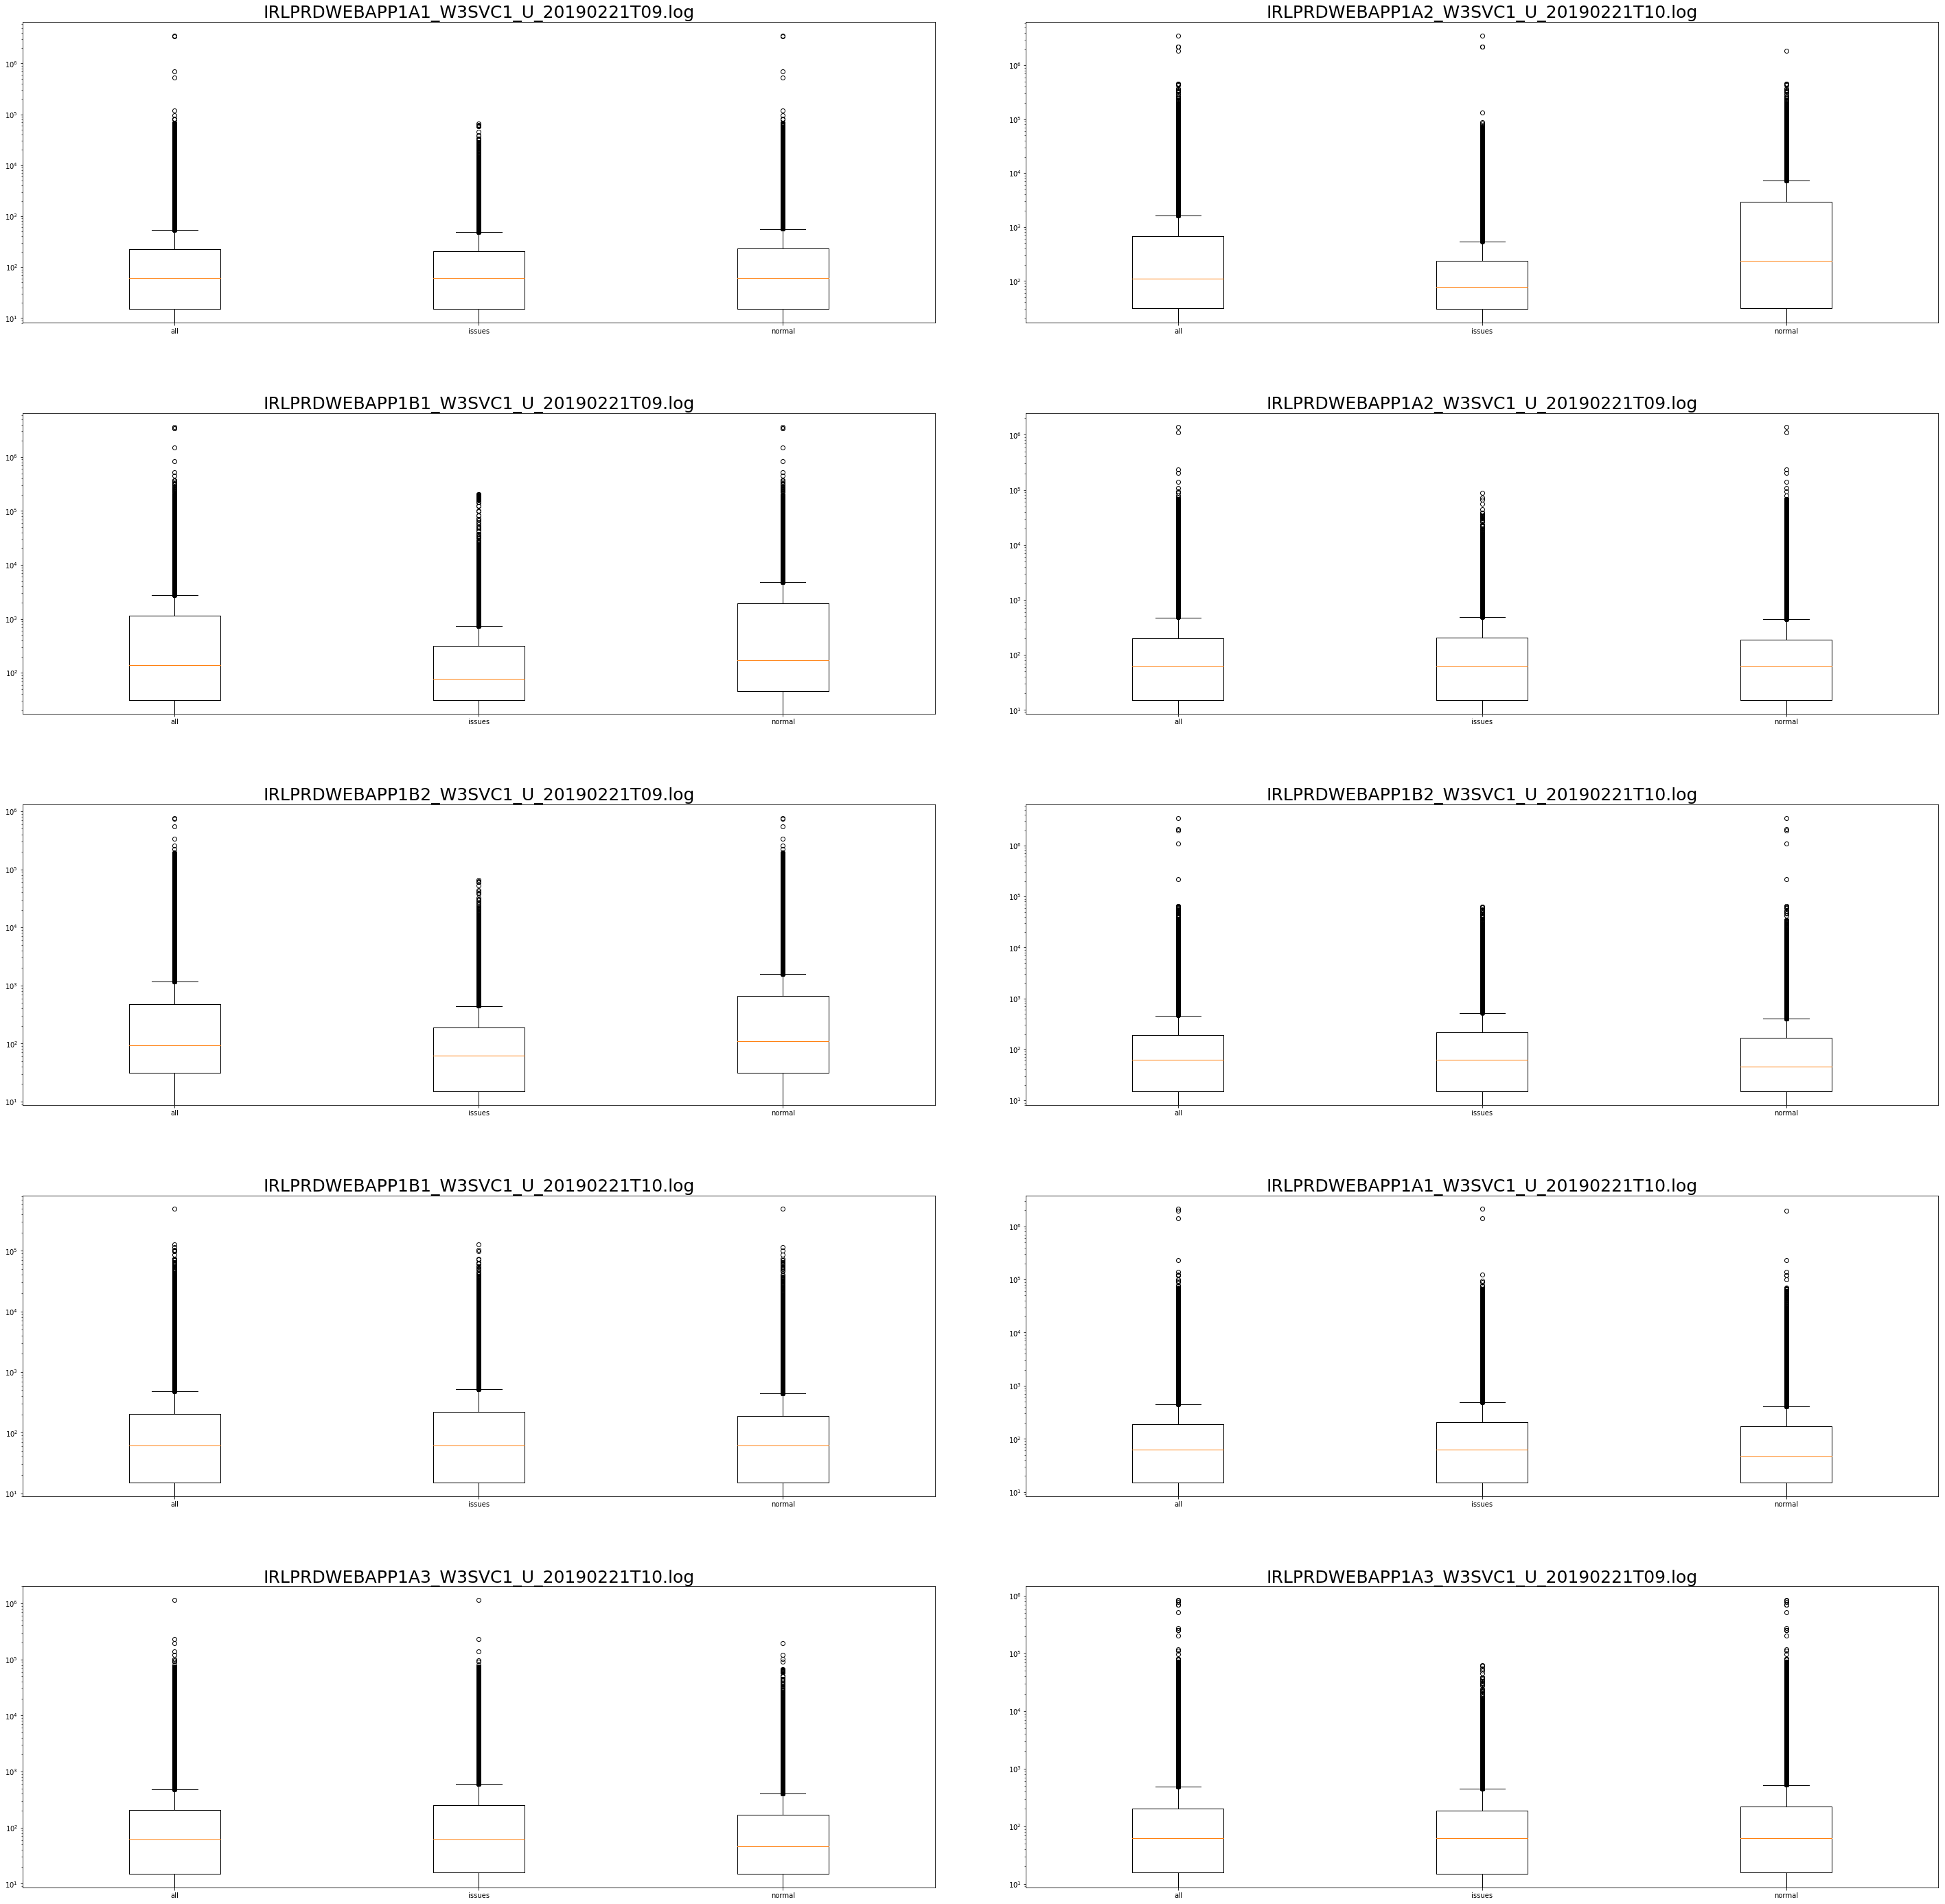

In [113]:
fig = plt.figure(figsize = (50,50))
#fig.tight_layout(h_pad = 5)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)
j = 1
k = "time-taken"
for i in dictionary:
    plt.subplot(5, 2, j) 
    plt.boxplot([dictionary[i][k].dropna(),dictionary2[i][k].dropna(),dictionary3[i][k].dropna()], labels=['all','issues','normal'])
    plt.yscale('log')
    plt.title(i, fontsize = 25)
    j += 1

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'normal')

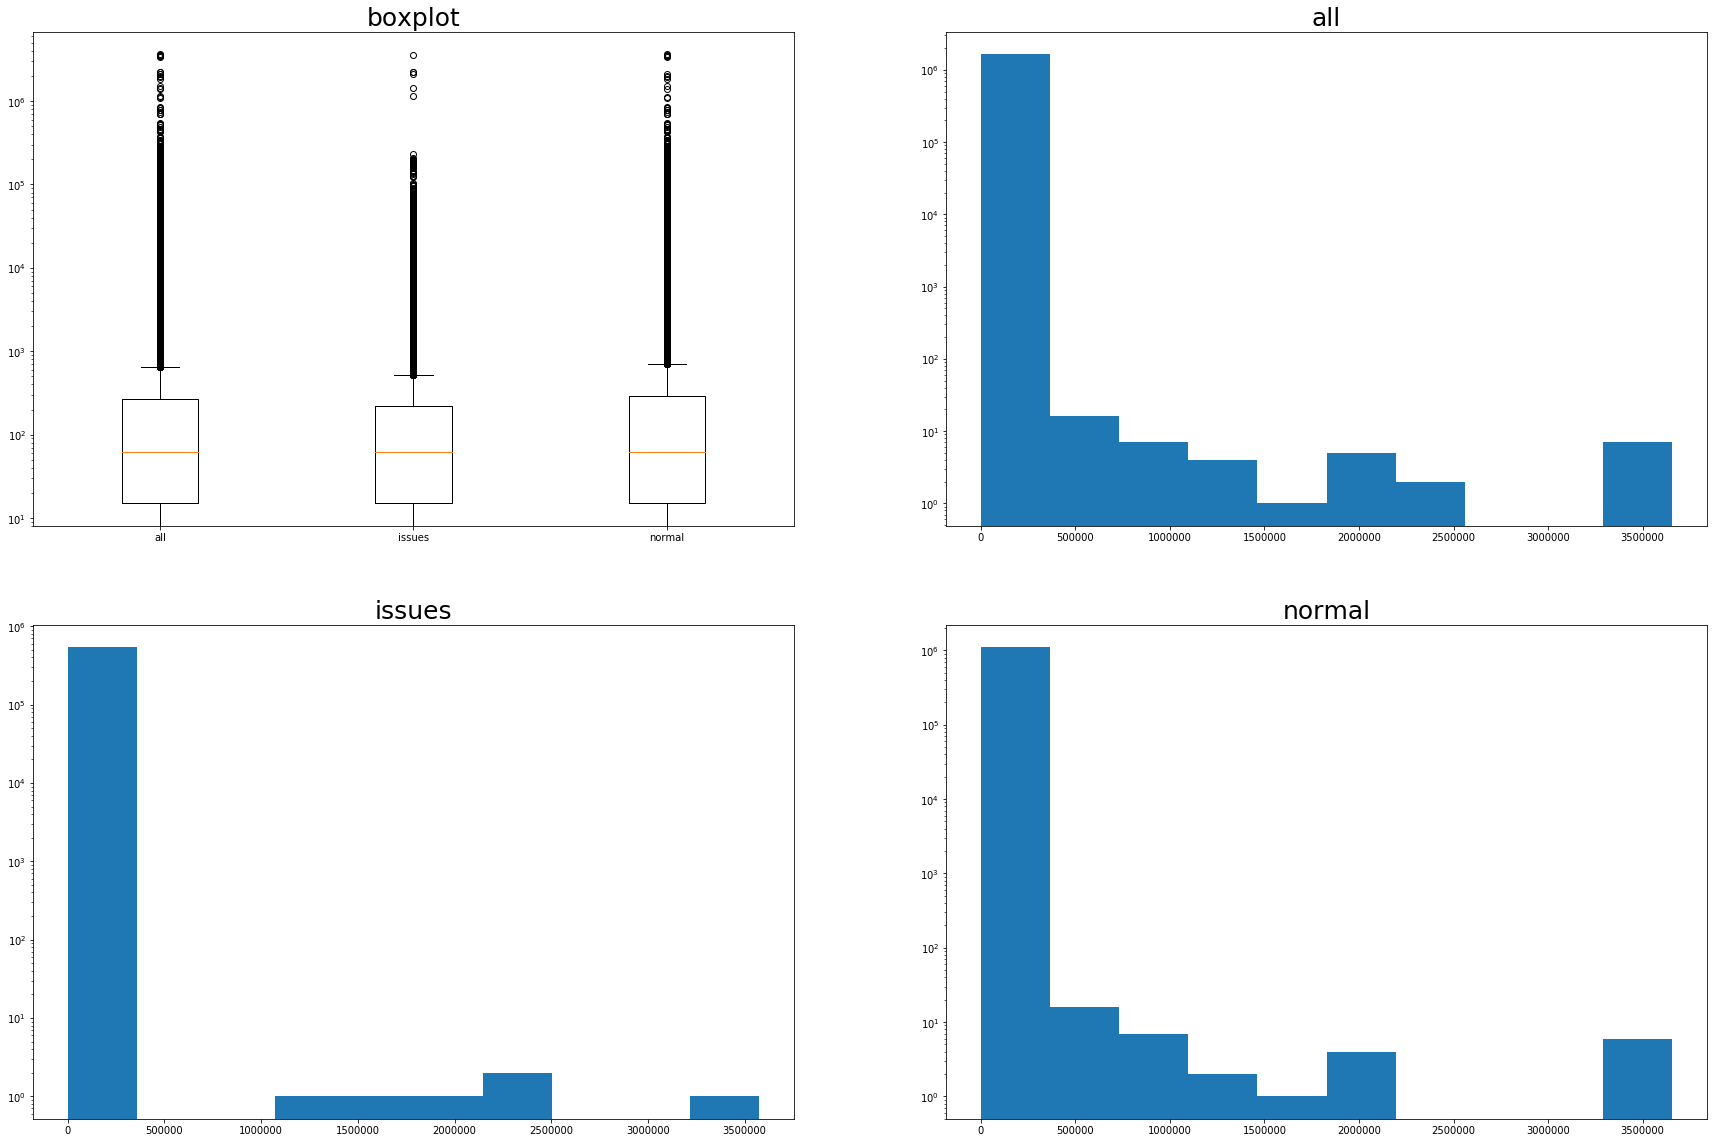

In [115]:
k = "time-taken"
plt.figure(figsize = (30,20))
plt.subplot(2, 2, 1) 
plt.boxplot([data[k].dropna(), data_issue[k].dropna(), data_normal[k].dropna()], labels=['all','issues','normal'])
plt.yscale('log')
plt.title("boxplot", fontsize = 25)
plt.subplot(2, 2, 2) 
plt.hist(data[k].dropna())
plt.yscale('log')
plt.title("all", fontsize = 25)
plt.subplot(2, 2, 3) 
plt.hist(data_issue[k].dropna())
plt.yscale('log')
plt.title("issues", fontsize = 25)
plt.subplot(2, 2, 4) 
plt.hist(data_normal[k].dropna())
plt.yscale('log')
plt.title("normal", fontsize = 25)

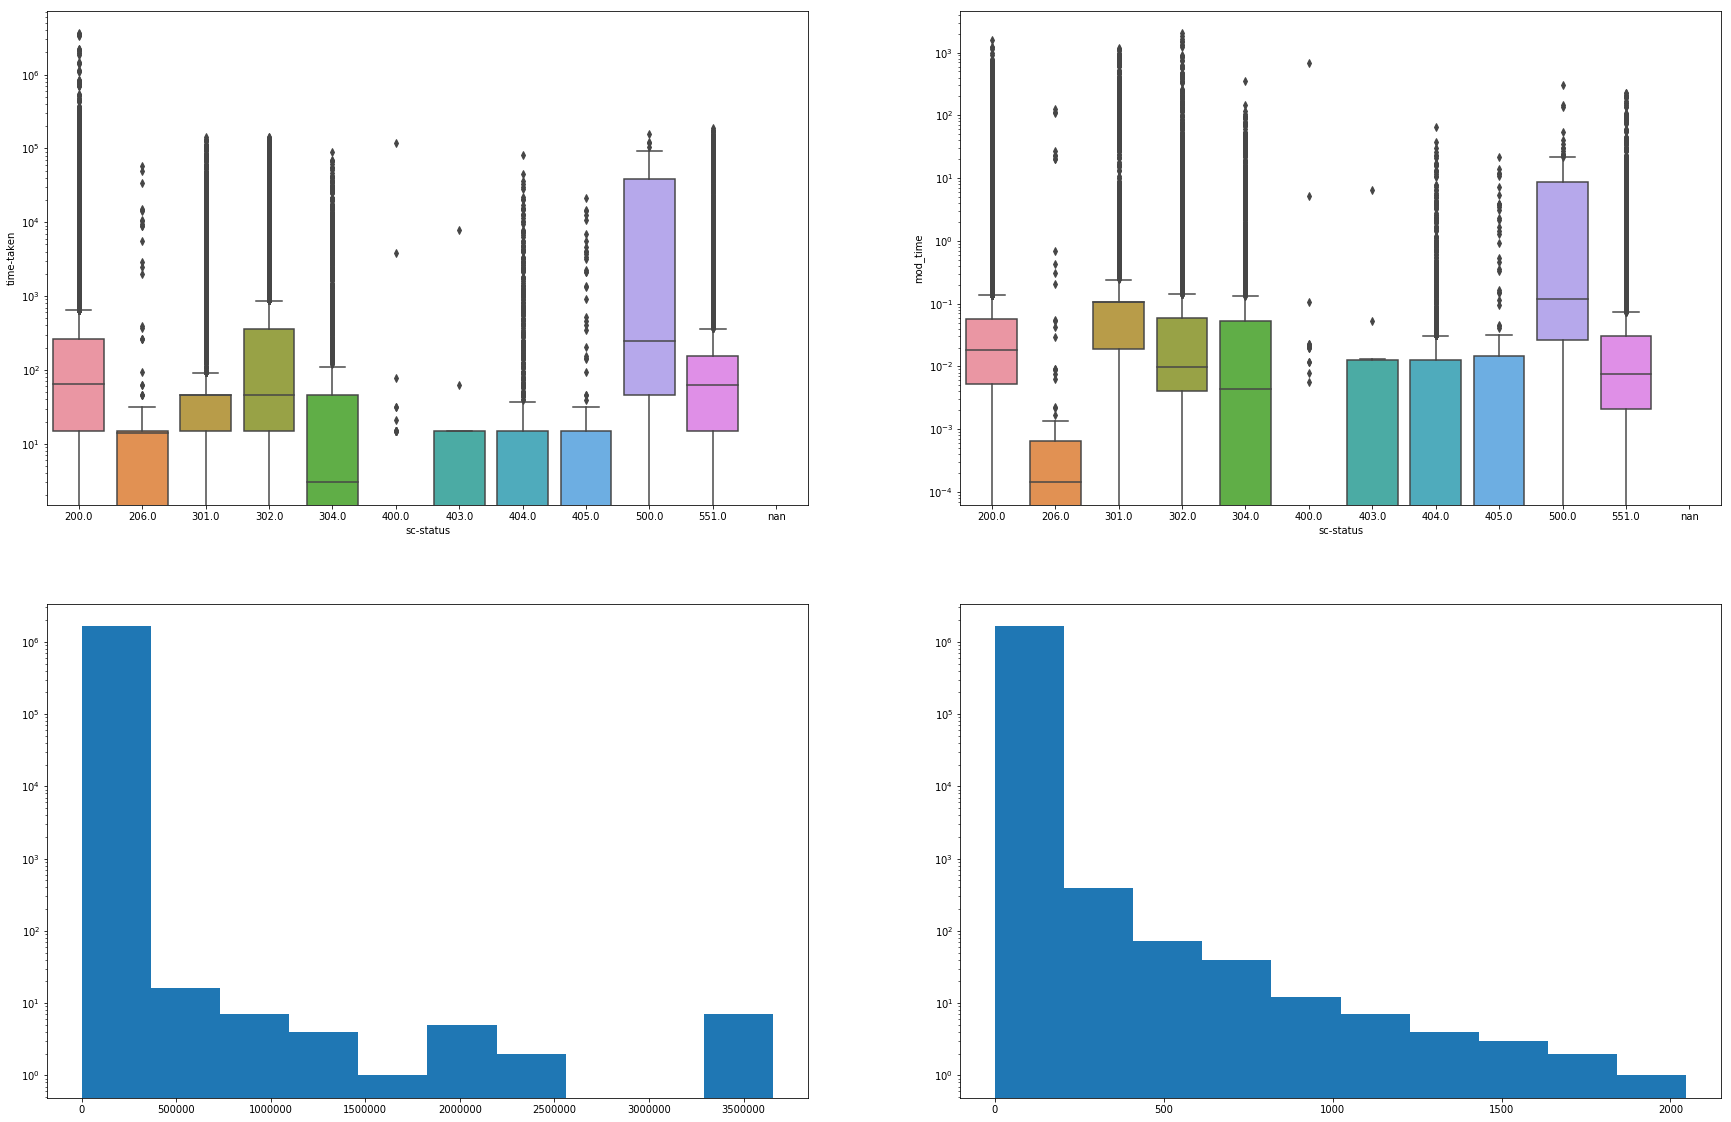

In [145]:
a = data
plt.figure(figsize = (30,20))
plt.subplot(2, 2, 1) 
sns.boxplot(y='time-taken', x='sc-status', data=a)
plt.yscale('log')
plt.subplot(2, 2, 2) 
sns.boxplot(y='mod_time', x='sc-status', data=a)
plt.yscale('log')
plt.subplot(2, 2, 3) 
plt.hist(data["time-taken"].dropna())
plt.yscale('log')
plt.subplot(2, 2, 4) 
plt.hist(data["mod_time"].dropna())
plt.yscale('log')

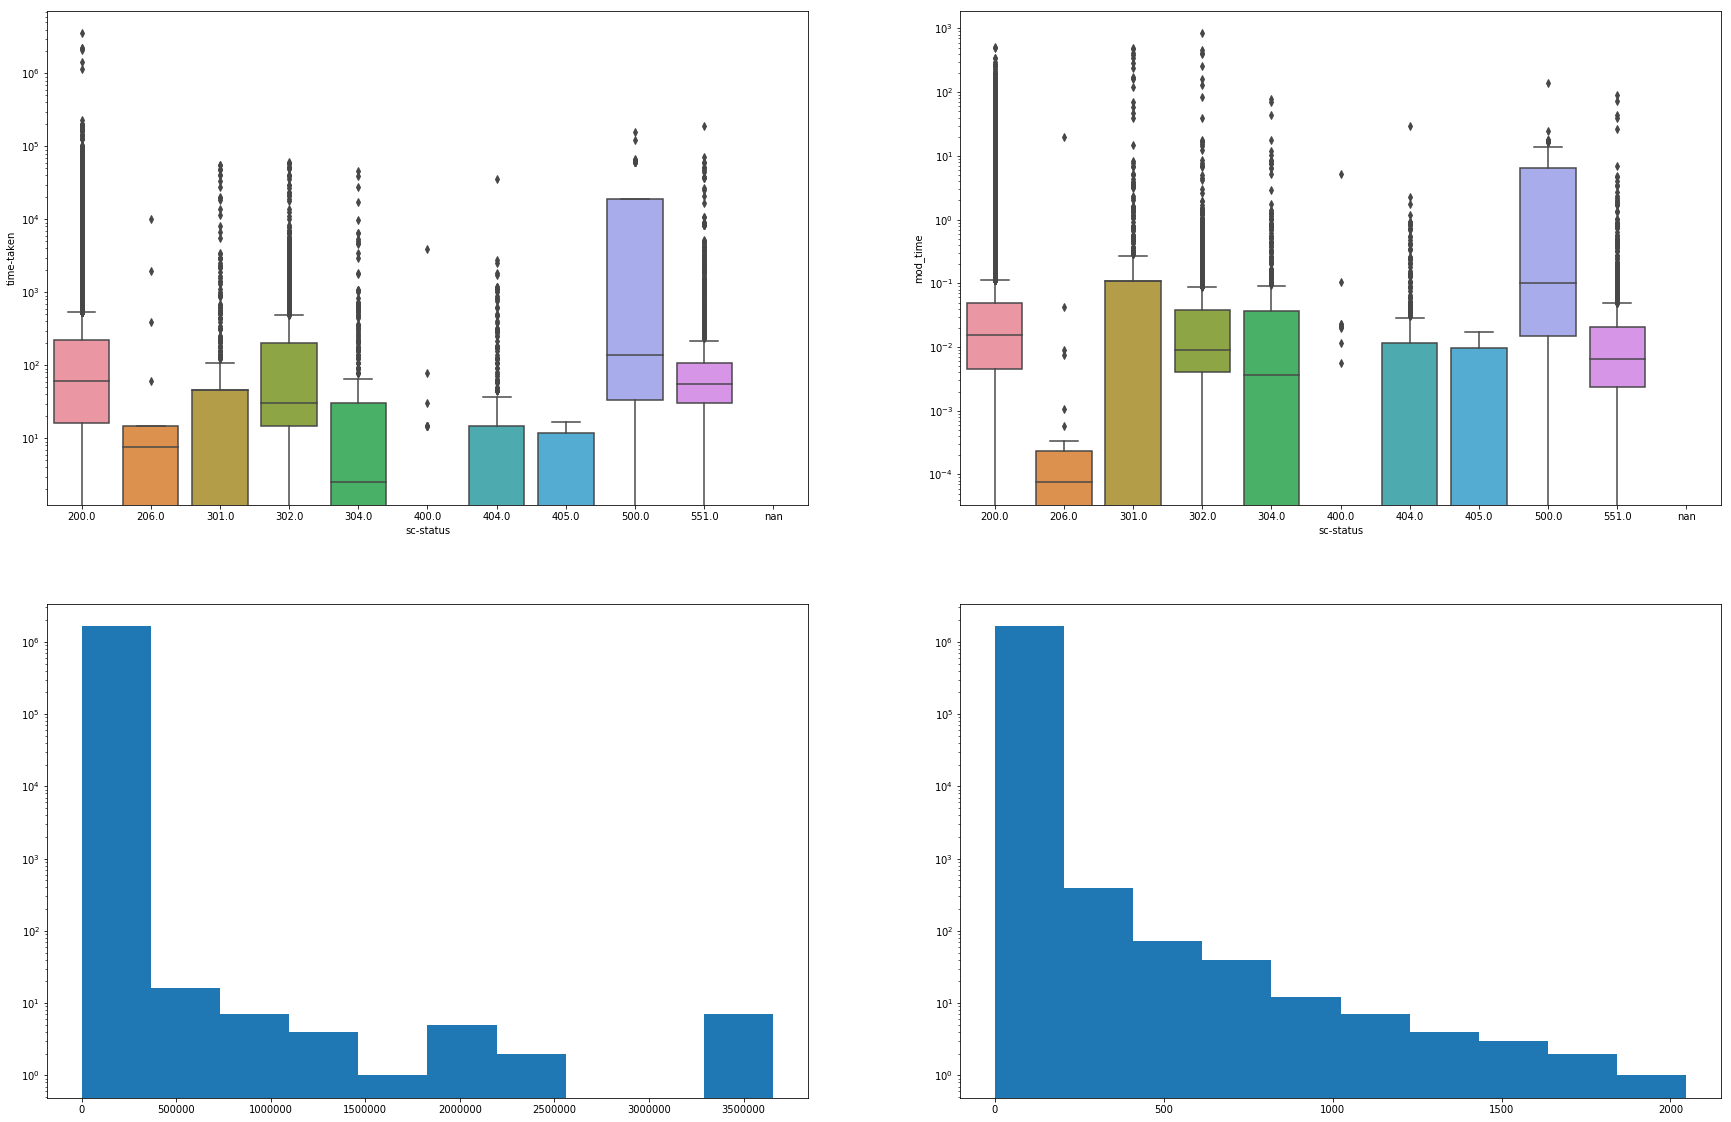

In [146]:
a = data_issue
plt.figure(figsize = (30,20))
plt.subplot(2, 2, 1) 
sns.boxplot(y='time-taken', x='sc-status', data=a)
plt.yscale('log')
plt.subplot(2, 2, 2) 
sns.boxplot(y='mod_time', x='sc-status', data=a)
plt.yscale('log')
plt.subplot(2, 2, 3) 
plt.hist(data["time-taken"].dropna())
plt.yscale('log')
plt.subplot(2, 2, 4) 
plt.hist(data["mod_time"].dropna())
plt.yscale('log')

In [130]:
data[data["time-taken"] >= data["time-taken"].quantile(.95)]["cs-host"].value_counts()

co-opheat.saasiteu.com                                                   8934
cambridgeassessment.saasiteu.com                                         5031
circlek.saasiteu.com                                                     4988
fr-stepsodexonet.saasiteu.com                                            4590
calloneit.saasiteu.com                                                   4467
irlprdwebapp1a2.ops.local                                                4301
johnsonmatthey.saasiteu.com                                              4010
oxford.saasiteu.com                                                      3882
hssonecall.saasiteu.com                                                  3222
williamhillhelpdesk.saasiteu.com                                         2595
abgbsc.saasiteu.com                                                      2472
it-servicedesk-itron.saasiteu.com                                        2178
moodmedia.saasiteu.com                                          

In [132]:
data_issue[data_issue["time-taken"] >= data_issue["time-taken"].quantile(.95)]["cs-host"].value_counts()

co-opheat.saasiteu.com                                                   3839
circlek.saasiteu.com                                                     2464
oxford.saasiteu.com                                                      2241
fr-stepsodexonet.saasiteu.com                                            2108
johnsonmatthey.saasiteu.com                                              1526
calloneit.saasiteu.com                                                   1138
williamhillhelpdesk.saasiteu.com                                         1081
cambridgeassessment.saasiteu.com                                          972
abgbsc.saasiteu.com                                                       906
hssonecall.saasiteu.com                                                   869
it-servicedesk-itron.saasiteu.com                                         856
soone-stepsodexonet.saasiteu.com                                          559
vix.saasiteu.com                                                

In [166]:
data.describe(include='all')

,date,time,cs-method,cs-uri-stem,s-port,cs-host,sc-status,sc-substatus,sc-win32-status,sc-bytes,cs-bytes,time-taken,machine,mod_time
count,1651427,1651427,1651427,1651427,1651427,1650931,1651427,1651427,1651427,1.650931e+06,1.650931e+06,1.650931e+06,1651427,1.650931e+06
unique,1,7200,9,3688,5,77,12,7,9,NaN,NaN,NaN,10,NaN
top,2019-02-21,09:28:00,POST,/handlers/GridDataHandler/GridDataHandler.ashx,443.0,co-opheat.saasiteu.com,200.0,0.0,0.0,NaN,NaN,NaN,IRLPRDWEBAPP1A3_W3SVC1_U_20190221T09.log,NaN
freq,1651427,740,1329450,325406,1389364,157411,1612174,1650010,1645137,NaN,NaN,NaN,183499,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.621110e+04,1.385802e+04,1.267659e+03,NaN,6.425021e-01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.508604e+05,8.447068e+04,1.156841e+04,NaN,9.593212e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,7.600000e+01,0.000000e+00,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.890000e+02,1.159000e+03,1.500000e+01,NaN,5.053166e-03
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.469000e+03,1.515000e+03,6.200000e+01,NaN,1.801278e-02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.629000e+03,8.951000e+03,2.650000e+02,NaN,5.784756e-02


In [5]:
def mask(column,threshold):
    counts = pd.value_counts(column)
    mask = column.isin(counts[counts > threshold].index)
    column[~mask] = "others"
    return column

In [91]:
data_a = dictionary['IRLPRDWEBAPP1A1_W3SVC1_U_20190221T10.log'][['cs-method', 'cs-uri-stem', 's-port', 'cs-host', 
            'sc-status', 'sc-substatus', 'sc-win32-status', 'sc-bytes', 'cs-bytes', 'mod_time']]
data_a['cs-uri-stem'] = mask(data_a['cs-uri-stem'], 500)
data_a['cs-host'] = mask(data_a['cs-host'], 500)
data_a = pd.get_dummies(data_a)
data_a = data_a.dropna(subset = ['sc-bytes', 'cs-bytes', 'mod_time'])
min_max_scaler = preprocessing.MinMaxScaler()
data_a[['sc-bytes', 'cs-bytes', 'mod_time']] = min_max_scaler.fit_transform(data_a[['sc-bytes', 'cs-bytes', 'mod_time']])
data_a

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

,sc-bytes,cs-bytes,mod_time,cs-method_GET,cs-method_HEAD,cs-method_OPTIONS,cs-method_POST,cs-uri-stem_/,cs-uri-stem_/Dashboard/services/CommandList.asmx/RunSavedSearch,cs-uri-stem_/Dashboard/services/Dashboard.asmx/GetDashboard,...,sc-substatus_11.0,sc-substatus_7.0,sc-substatus_nan,sc-win32-status_0.0,sc-win32-status_1.0,sc-win32-status_1236.0,sc-win32-status_2.0,sc-win32-status_64.0,sc-win32-status_995.0,sc-win32-status_nan
0,0.000035,0.000742,3.352502e-05,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.000102,0.000382,1.112840e-05,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.000003,0.000076,4.705655e-04,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.000019,0.000056,1.218293e-05,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.000006,0.000042,1.106169e-04,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,0.000224,0.000022,0.000000e+00,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0.002106,0.000024,3.174573e-07,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0.000004,0.000033,0.000000e+00,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0.000046,0.000155,1.486547e-05,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0.000128,0.000259,2.122392e-04,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
data_a.shape

(180462, 138)

In [84]:
model =  IsolationForest(contamination = 0.001)
model.fit(data_a)
data_a['anomaly25'] = pd.Series(model.predict(data_a))
data_a['anomaly25'] = data_a['anomaly25'].map( {1: 0, -1: 1} )
print(data_a['anomaly25'].value_counts())

0.0    180169
1.0       189
Name: anomaly25, dtype: int64


In [60]:
j = 0
for i in data_a.columns:
    print(j,"\t", i, "\n---------\n")
    j += 1

0 	 sc-bytes 
---------

1 	 cs-bytes 
---------

2 	 mod_time 
---------

3 	 cs-method_GET 
---------

4 	 cs-method_HEAD 
---------

5 	 cs-method_OPTIONS 
---------

6 	 cs-method_POST 
---------

7 	 cs-uri-stem_/ 
---------

8 	 cs-uri-stem_/Dashboard/services/CommandList.asmx/RunSavedSearch 
---------

9 	 cs-uri-stem_/Dashboard/services/Dashboard.asmx/GetDashboard 
---------

10 	 cs-uri-stem_/Dashboard/services/DashboardPartService.asmx/GetFlexChartData 
---------

11 	 cs-uri-stem_/Dashboard/services/DashboardPartService.asmx/getChartInfo 
---------

12 	 cs-uri-stem_/Default.aspx 
---------

13 	 cs-uri-stem_/Modules/SelfService/DirectRouter/Index 
---------

14 	 cs-uri-stem_/SelfService/services/SelfService.asmx/GetAlerts 
---------

15 	 cs-uri-stem_/ServiceAPI/FRSHEATIntegration.asmx 
---------

16 	 cs-uri-stem_/ServiceCatalog/handlers/DownloadAttachment.ashx 
---------

17 	 cs-uri-stem_/ServiceCatalog/services/ServiceSubscription.asmx/GetRequestData 
---------

18 	 c

In [85]:
data_a["cs-method"] = data_a[data_a.filter(like='cs-method_').columns].idxmax(axis=1).str.lstrip("cs-method_")
data_a["cs-uri-stem"] = data_a[data_a.filter(like='cs-uri-stem_').columns].idxmax(axis=1).str.lstrip("cs-uri-stem_")
data_a["s-port"] = data_a[data_a.filter(like='s-port_').columns].idxmax(axis=1).str.lstrip("s-port_")
data_a["cs-host"] = data_a[data_a.filter(like='cs-host_').columns].idxmax(axis=1).str.lstrip("cs-host_")
data_a["sc-status"] = data_a[data_a.filter(like='sc-status_').columns].idxmax(axis=1).str.lstrip("sc-status_")
data_a["sc-substatus"] = data_a[data_a.filter(like='sc-substatus_').columns].idxmax(axis=1).str.lstrip("sc-substatus_")
data_a["sc-win32-status"] = data_a[data_a.filter(like='sc-win32-status_').columns].idxmax(axis=1).str.lstrip("sc-win32-status_")

In [89]:
data_a[data_a["anomaly25"] == 1]["cs-host"].value_counts()

pheat.saasiteu.com                    28
irlprdwebapp1a1.ops.local             16
alloneit.saasiteu.com                 15
ambridgeassessment.saasiteu.com       14
irclek.saasiteu.com                   13
ers                                    8
necall.saasiteu.com                    8
johnsonmatthey.saasiteu.com            7
georges.saasiteu.com                   6
fr-stepsodexonet.saasiteu.com          5
uniofcam.saasiteu.com                  5
xford.saasiteu.com                     5
abgbsc.saasiteu.com                    4
ne-stepsodexonet.saasiteu.com          4
williamhillhelpdesk.saasiteu.com       4
fr.saasiteu.com                        3
it-servicedesk-itron.saasiteu.com      3
grouperocher.saasiteu.com              3
bca.saasiteu.com                       3
globalinternet.saasiteu.com            3
rexelcustomerservice.saasiteu.com      3
epsodexonet.saasiteu.com               3
rose-grouperocher.saasiteu.com         2
fg-prd.saasiteu.com                    2
pinkelephant.saa

In [90]:
data_a["cs-host"].value_counts()

irlprdwebapp1a1.ops.local             18746
pheat.saasiteu.com                    16826
ambridgeassessment.saasiteu.com       11461
johnsonmatthey.saasiteu.com            9951
alloneit.saasiteu.com                  9402
irclek.saasiteu.com                    8704
georges.saasiteu.com                   7241
necall.saasiteu.com                    6956
fr-stepsodexonet.saasiteu.com          6505
abgbsc.saasiteu.com                    6088
xford.saasiteu.com                     5945
moodmedia.saasiteu.com                 3908
uniofcam.saasiteu.com                  3649
williamhillhelpdesk.saasiteu.com       3200
nexans.saasiteu.com                    2998
rose-grouperocher.saasiteu.com         2884
ers                                    2873
pinkelephant.saasiteu.com              2809
ergo.saasiteu.com                      2800
grouperocher.saasiteu.com              2709
it-servicedesk-itron.saasiteu.com      2291
erh-stepsodexonet.saasiteu.com         2203
roda.saasiteu.com               

In [88]:
data_a[data_a["anomaly25"] == 1]

,sc-bytes,cs-bytes,mod_time,cs-method_GET,cs-method_HEAD,cs-method_OPTIONS,cs-method_POST,cs-uri-stem_/,cs-uri-stem_/Dashboard/services/CommandList.asmx/RunSavedSearch,cs-uri-stem_/Dashboard/services/Dashboard.asmx/GetDashboard,...,sc-win32-status_995.0,sc-win32-status_nan,anomaly25,cs-method,cs-uri-stem,s-port,cs-host,sc-status,sc-substatus,sc-win32-status
2297,0.000003,0.000127,0.002955,0,0,0,1,0,0,0,...,0,0,1.0,POST,/Services/FormService.asmx/GetChildTabsCount,443.0,uniofcam.saasiteu.com,200.0,0.0,0.0
5255,0.000007,0.000054,0.000071,0,0,0,1,0,0,0,...,0,0,1.0,POST,/Services/FormService.asmx/GetEscalationSchedule,443.0,ambridgeassessment.saasiteu.com,200.0,0.0,0.0
5261,0.001178,0.000018,0.000000,1,0,0,0,0,0,0,...,0,0,1.0,GET,others,443.0,fr.saasiteu.com,200.0,0.0,0.0
5351,0.000033,0.001424,0.000005,0,0,0,1,0,0,0,...,0,0,1.0,POST,/handlers/GridDataHandler/GridDataHandler.ashx,443.0,williamhillhelpdesk.saasiteu.com,200.0,0.0,0.0
6301,0.000004,0.000048,0.115448,0,0,0,1,0,0,0,...,0,0,1.0,POST,others,443.0,rexelcustomerservice.saasiteu.com,200.0,0.0,0.0
6315,0.000112,0.000039,0.010669,1,0,0,0,0,0,0,...,0,0,1.0,GET,/css/dynamic/CustomStyleGenerator.ashx,443.0,ambridgeassessment.saasiteu.com,200.0,0.0,0.0
6328,0.000007,0.000043,0.103454,1,0,0,0,0,0,0,...,0,0,1.0,GET,others,443.0,irclek.saasiteu.com,200.0,0.0,0.0
6337,0.000015,0.000061,0.051902,0,0,0,1,0,0,0,...,0,0,1.0,POST,/Services/FormService.asmx/GetFormDataWithExpr...,443.0,ambridgeassessment.saasiteu.com,200.0,0.0,0.0
6342,0.000007,0.000821,0.011335,0,0,0,1,0,0,0,...,0,0,1.0,POST,/Services/FormService.asmx/GetFormValidationLi...,443.0,pheat.saasiteu.com,200.0,0.0,0.0
6381,0.000019,0.000055,0.043802,0,0,0,1,0,0,0,...,0,0,1.0,POST,/Services/FormService.asmx/GetFormDataWithExpr...,443.0,rbit.saasiteu.com,200.0,0.0,0.0


In [92]:
model =  OneClassSVM(nu=0.95 * 0.01) #nu=0.95 * outliers_fraction  + 0.05
model.fit(data_a)
data['anomaly26'] = pd.Series(model.predict(data_a))
data['anomaly26'] = data['anomaly26'].map( {1: 0, -1: 1} )
print(data['anomaly26'].value_counts())

KeyboardInterrupt: 

In [ ]:
n_cluster = range(12, 30)
kmeans = [KMeans(n_clusters=i).fit(data_a) for i in n_cluster]
print(1)
scores = [kmeans[i].score(data_a) for i in range(len(kmeans))]
print(2)
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [25]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in data.index:
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

In [37]:
distance = getDistanceByPoint(data_a, kmeans[12])
number_of_outliers = int(0.1*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
data_a['anomaly21'] = (distance >= threshold).astype(int)

ValueError: operands could not be broadcast together with shapes (139,) (138,) 

In [34]:
data_a

,sc-bytes,cs-bytes,mod_time,cs-method_GET,cs-method_HEAD,cs-method_OPTIONS,cs-method_POST,cs-uri-stem_/,cs-uri-stem_/Dashboard/services/CommandList.asmx/RunSavedSearch,cs-uri-stem_/Dashboard/services/Dashboard.asmx/GetDashboard,...,sc-substatus_7.0,sc-substatus_nan,sc-win32-status_0.0,sc-win32-status_1.0,sc-win32-status_1236.0,sc-win32-status_2.0,sc-win32-status_64.0,sc-win32-status_995.0,sc-win32-status_nan,anomaly21
0,0.000035,0.000742,3.352502e-05,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN
1,0.000102,0.000382,1.112840e-05,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
2,0.000003,0.000076,4.705655e-04,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
3,0.000019,0.000056,1.218293e-05,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
4,0.000006,0.000042,1.106169e-04,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0.0
5,0.000224,0.000022,0.000000e+00,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
6,0.002106,0.000024,3.174573e-07,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
7,0.000004,0.000033,0.000000e+00,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
8,0.000046,0.000155,1.486547e-05,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
9,0.000128,0.000259,2.122392e-04,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
